In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#Load the data
df = pd.read_excel('C:/Users/Sai/Documents/Deepsphere AI/Input.xlsx')
df.head(7)

,PATIENT ID,AGE,MARITAL STATUS,FINANCIAL STATUS,MEDICLAIM,NUMBER OF MEDICATIONS,ALCOHOL ADICTION,SMOKING,BLOOD PRESSURE,MOOD,...,SORE THROAT,ALLERGIES,COLD,COUGH,FEVER,STOMACH ACHE,DROWSINESS,MEDICINE 1,MEDICINE 2,LABEL
0,PAT001,65,Unmarried,Poor,Yes,1,Yes,Once a week,120,Excited,...,Yes,No,Yes,No,Low,No,Yes,Clopidogrel,Filgrastim,1
1,PAT002,62,Unmarried,Poor,No,2,Ocassionally,Once a week,120,Sad,...,Yes,No,Yes,No,High,No,Yes,Atorvastatin,Diazepam,1
2,PAT003,62,Married,Poor,Yes,10,Ocassionally,Yes,140,Excited,...,No,No,Yes,No,High,No,Yes,Clindamycin,EMLA cream,1
3,PAT004,58,Unmarried,Poor,No,6,Yes,Once a week,100,Sad,...,No,No,Yes,No,High,No,Yes,Cefixime,Dacarbazine,1
4,PAT005,72,Married,Poor,No,2,No,No,110,Excited,...,Yes,No,Yes,No,High,No,Yes,Cetrizine,Ifosfamide,1
5,PAT006,46,Unmarried,Middle Class,No,7,No,Yes,130,Sad,...,No,No,Yes,No,High,No,Yes,Betamethasone,Famotidine,1
6,PAT007,26,Unmarried,Poor,No,4,No,Yes,110,Sad,...,Yes,No,Yes,No,Low,No,Yes,Clindamycin,Filgrastim,1


# DATA PREPROCESSING

In [3]:
#Check for na or missing data
df.isna().sum()

PATIENT ID                              0
AGE                                     0
MARITAL STATUS                          0
FINANCIAL STATUS                        0
MEDICLAIM                               0
NUMBER OF MEDICATIONS                   0
ALCOHOL ADICTION                        0
SMOKING                                 0
BLOOD PRESSURE                          0
MOOD                                    0
ENERGY LEVELS                           0
HEADACHE                                0
CONCENTRATION                           0
DRUG COST                               0
FOLLOWUP CHECKUPS                       0
PRESCRIBTION START DATE                 0
PRESCRIBTION END DATE                   0
REFILL FREQUENCY(MEDICINE1)             0
REFILL FREQUENCY(MEDICINE2)             0
PRESCRIBED MEDICATION PERIOD(MONTHS)    0
REFILLS DONE(MEDICINE 1)                0
REFILLS DONE(MEDICINE 2)                0
SEVIERITY OF ILLNESS(CHECKUP 1)         0
SEVIERITY OF ILLNESS(CHECKUP 2)   

In [4]:
X = df.drop(['AGE', 'MARITAL STATUS', 'ALCOHOL ADICTION', 'SMOKING', 'BLOOD PRESSURE', 'MOOD', 'ENERGY LEVELS', 'HEADACHE', 'CONCENTRATION', 'PRESCRIBTION START DATE', 'PRESCRIBTION END DATE', 'CHRONIC ILLNESS', 'DIARRHEA', 'CONSTIPATION', 'NAUSEA', 'VOMITING', 'SORE THROAT', 'ALLERGIES', 'COLD', 'COUGH', 'FEVER', 'STOMACH ACHE', 'DROWSINESS', 'FREQUENCY', 'FINANCIAL STATUS', 'MEDICLAIM', 'NUMBER OF MEDICATIONS', 'DRUG COST'], axis = 1)
X

,PATIENT ID,FOLLOWUP CHECKUPS,REFILL FREQUENCY(MEDICINE1),REFILL FREQUENCY(MEDICINE2),PRESCRIBED MEDICATION PERIOD(MONTHS),REFILLS DONE(MEDICINE 1),REFILLS DONE(MEDICINE 2),SEVIERITY OF ILLNESS(CHECKUP 1),SEVIERITY OF ILLNESS(CHECKUP 2),SEVIERITY OF ILLNESS(CHECKUP 3),SEVIERITY OF ILLNESS(CHECKUP 4),SEVIERITY OF ILLNESS(CHECKUP 5),MEDICINE 1,MEDICINE 2,LABEL
0,PAT001,1,Fortnightly,Fortnightly,5,6,5,0,0,0,0,0,Clopidogrel,Filgrastim,1
1,PAT002,1,Monthly,Fortnightly,1,10,8,0,0,0,0,0,Atorvastatin,Diazepam,1
2,PAT003,1,Fortnightly,Monthly,5,8,10,0,0,0,0,0,Clindamycin,EMLA cream,1
3,PAT004,1,Weekly,Monthly,4,5,5,0,0,0,0,0,Cefixime,Dacarbazine,1
4,PAT005,1,Monthly,Monthly,4,7,5,0,0,0,0,0,Cetrizine,Ifosfamide,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PAT996,5,Monthly,Monthly,9,8,4,1,2,1,3,2,Chlorambucil,Enoxaparin,1
996,PAT997,5,Fortnightly,Monthly,9,6,7,1,2,2,2,1,Carboplatin,Dacarbazine,1
997,PAT998,2,Weekly,Monthly,1,4,4,2,0,0,0,0,Chlorambucil,Hydroxychloroquine phosphate,0
998,PAT999,4,Weekly,Monthly,11,4,8,1,0,0,0,0,Cefixime,EMLA cream,1


In [5]:
#Convert all the non-numeric columns to numerical data types
for column in X.columns:
    if X[column].dtype == np.number:
        continue
    X[column] = LabelEncoder().fit_transform(X[column])

<ipython-input-5-08bd5ff1febe>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if X[column].dtype == np.number:


In [6]:
#Scale the cleaned data
x = X.drop('LABEL', axis = 1)
y = X['LABEL']

#Standardizing/Scaling the features
X1 = StandardScaler().fit_transform(x)

# PREDICTING ADHERENT AND NON-ADHERENT PATIENTS USING RANDOM FOREST 

In [7]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
X_train = x_train.drop(['PATIENT ID', 'MEDICINE 1', 'MEDICINE 2'], axis=1)
X_test = x_test.drop(['PATIENT ID', 'MEDICINE 1', 'MEDICINE 2'], axis=1)

In [9]:
#Create the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
#from sklearn.tree import DecisionTreeClassifier
#model = DecisionTreeClassifier()
#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression()
#Train the model
model.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
predictions = model.predict(X_test)

#printing the predictions
print(predictions)

[0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0
 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1
 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1]


In [11]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, predictions)
print(accuracy_score)

0.78


In [12]:
df1 = x_test[['PATIENT ID', 'MEDICINE 1', 'MEDICINE 2']]

In [13]:
df1['Label'] = pd.Series(predictions, index=df1.index)

<ipython-input-13-d5faa231a70f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Label'] = pd.Series(predictions, index=df1.index)


In [14]:
df1["Label"] = df1["Label"].replace({0: "Adherent", 1: "Non-Adherent"})
df1

<ipython-input-14-285b05a002c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Label"] = df1["Label"].replace({0: "Adherent", 1: "Non-Adherent"})


,PATIENT ID,MEDICINE 1,MEDICINE 2,Label
521,522,6,9,Adherent
737,738,1,9,Adherent
740,741,7,5,Adherent
660,661,6,5,Non-Adherent
411,412,6,3,Non-Adherent
...,...,...,...,...
408,409,4,5,Non-Adherent
332,333,2,5,Non-Adherent
208,209,2,0,Non-Adherent
613,614,6,1,Adherent


In [15]:
df1.to_excel('C:/Users/Sai/Documents/Deepsphere AI/Patient Non-Adherence/5_ModelOutcome/Output.xlsx')

# FEATURE IMPORTANCE

In [16]:
from matplotlib import pyplot as plt
model.feature_importances_

array([0.10454776, 0.08105715, 0.04218397, 0.2933532 , 0.15238334,
       0.15112617, 0.09528147, 0.02020328, 0.02126071, 0.01911209,
       0.01949087])

<BarContainer object of 11 artists>

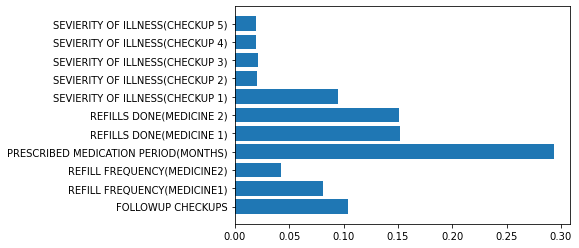

In [17]:
plt.barh(X_test.columns, model.feature_importances_)

# KFOLD CROSS VALIDATION

In [18]:
from sklearn.model_selection import cross_validate
cv = cross_validate(model, x, y, cv=10)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.7  0.77 0.79 0.75 0.82 0.83 0.77 0.83 0.79 0.76]
0.7809999999999999


# PREDICTING ADHERENT AND NON-ADHERENT PATIENTS USING XGBOOST

In [19]:
from xgboost import XGBClassifier
x1 = x
y1 = y

In [20]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=123) 

In [21]:
X1_train = x1_train.drop(['PATIENT ID', 'MEDICINE 1', 'MEDICINE 2'], axis=1)
X1_test = x1_test.drop(['PATIENT ID', 'MEDICINE 1', 'MEDICINE 2'], axis=1)

In [34]:
model1 = XGBClassifier(max_depth=10, min_child_weight=5, subsample=0.3, learning_rate=0.05, gamma=2, reg_lambda=0)
model1.fit(X1_train, y1_train)

[21:19:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
y_pred = model1.predict(X1_test)

In [36]:
predictions = [round(value) for value in y_pred]

In [37]:
from sklearn.model_selection import cross_validate
cv1 = cross_validate(model1, x1, y1, cv=10)
print(cv1['test_score'])
print(cv1['test_score'].mean())

C:\Users\Sai\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

# The accuracy for RandomForestClassifier is 78% and The accuracy for XGBoost is 79.8%
